In [1]:
import numpy as np
import pandas as pd 

from fbprophet import Prophet

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read CSV Data

In [2]:
df = pd.read_csv('./BOT_OUTPUT_DATA/Pune.csv')

In [3]:
df.head()

,ds,y
0,2016-1-1,444
1,2016-1-2,444
2,2016-1-3,444
3,2016-1-4,444
4,2016-1-5,444


#### Drop NULL values

In [4]:
df.dropna()
df.count()

ds    2555
y     2555
dtype: int64

#### Make Predictor

In [5]:
m = Prophet(daily_seasonality=True)

In [6]:
m.fit(df)

/Users/suyashlawand/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.0122
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5632.17    0.00505705       132.897      0.7217      0.7217      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5638.01   0.000500203       100.596      0.4904      0.4904      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5640.13   0.000155208       289.214   5.544e-07       0.001      344  LS failed, Hessian reset 
     299       5640.98   2.57398e-05       39.9678        0.13           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     394       5641.71   0.000212025       210.124   2.084e-06       0.001      570  LS failed, Hessian reset 
     399       5641.83   0.000357495       343.036      0.9914      0.9914      575   
    Iter      log pro

terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [7]:
forecast = m.make_future_dataframe(periods=365)
forecast = m.predict(forecast)

forecast.head(5)

/Users/suyashlawand/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/suyashlawand/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,436.146873,410.302948,512.531609,436.146873,436.146873,22.802047,22.802047,22.802047,-27.804379,...,-0.374236,-0.374236,-0.374236,50.980662,50.980662,50.980662,0.0,0.0,0.0,458.948920
1,2016-01-02,436.101326,405.828964,507.590313,436.101326,436.101326,21.242804,21.242804,21.242804,-27.804379,...,-0.655482,-0.655482,-0.655482,49.702665,49.702665,49.702665,0.0,0.0,0.0,457.344130
2,2016-01-03,436.055779,403.616661,502.091598,436.055779,436.055779,19.961562,19.961562,19.961562,-27.804379,...,-0.545468,-0.545468,-0.545468,48.311409,48.311409,48.311409,0.0,0.0,0.0,456.017341
3,2016-01-04,436.010232,403.642732,502.041183,436.010232,436.010232,18.707475,18.707475,18.707475,-27.804379,...,-0.302330,-0.302330,-0.302330,46.814184,46.814184,46.814184,0.0,0.0,0.0,454.717707
4,2016-01-05,435.964685,404.529626,504.358511,435.964685,435.964685,17.872397,17.872397,17.872397,-27.804379,...,0.458675,0.458675,0.458675,45.218100,45.218100,45.218100,0.0,0.0,0.0,453.837082


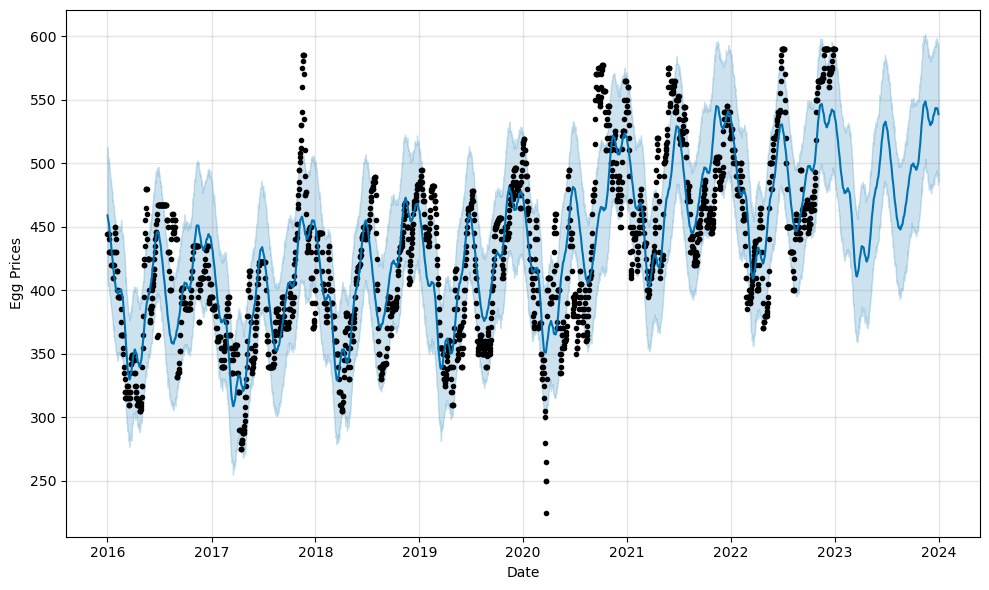

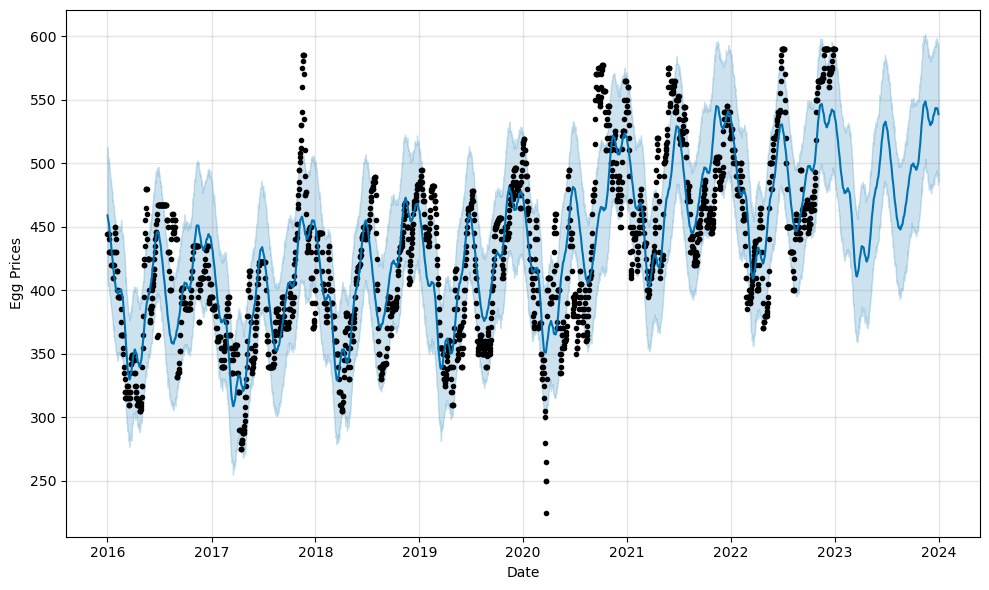

In [8]:
m.plot(forecast, ylabel='Egg Prices', xlabel='Date')